<a href="https://colab.research.google.com/github/tjdgus2319/domain/blob/master/basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day9. 기본과제

Req-1. basic.
ipynb 파일을 생 성 한 후 Hello World 를 출력해 보세요

In [ ]:
!git clone https://github.com/tjdgus2319/domain.git '/gdrive/My Drive/domain_git'

print("Hello World")


Cloning into '/gdrive/My Drive/domain_git'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
Hello World


Req-2. basic.ipynb
파일에 일주일은 몇 초 인지 표시하는 코드를 자유롭게 Colab
에 추가 후 실행해 보세요.


In [ ]:
print(7*24*60*60)

604800


Req-3. basic.ipynb
파일에 Colab 의 코드 스니펫 창의 다음의 코드들을 추가 후
실행해 보세요
- Visualization: Linked Brushing in Altair
- Camera Capture 를 추가해 본인의 얼굴을 찍어 보세요
- 추가로 1 개의 코드 스니펫을 자유롭게 선택 하여 올려 놓습니다
실행결과를
그대로 저장해 주세요

In [ ]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

points = alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(cars).mark_bar().encode(
  x='count()',
  y='Origin',
  color='Origin'
).transform_filter(interval)

points & histogram

alt.VConcatChart(...)

<IPython.core.display.Javascript object>

Saved to photo.jpg


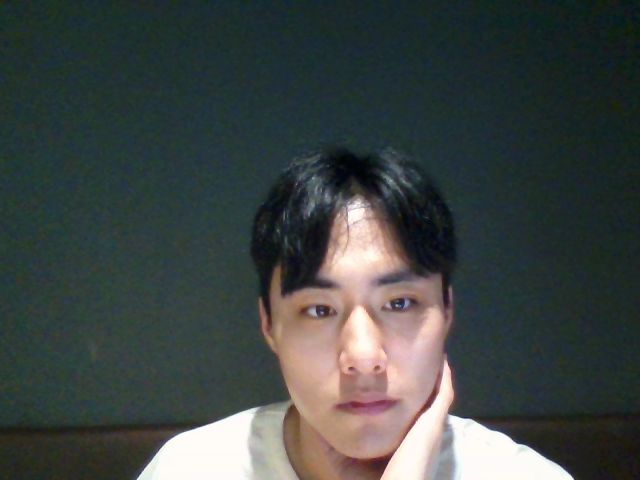

In [ ]:
# Camera Capture 를 추가해 본인의 얼굴을 찍어 보세요
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0   244k      0 --:--:-- --:--:-- --:--:--  244k


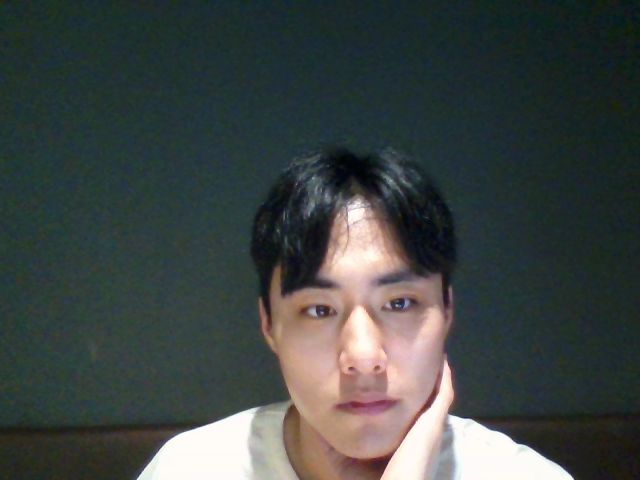

In [ ]:
# 추가로 1 개의 코드 스니펫을 자유롭게 선택 하여 올려 놓습니다 실행결과를 그대로 저장해 주세요
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

Req-4. basic.ipynb
파일에 Google Drive 연동을 하는 코드를 추가하고 본인의 구글
드라이브 에 임의의 텍스트파일을 저장하는 코드를 작성해보세요 코드
스니펫 의 Mounting Google Drive in your VM 을 사용해도 무방합니다

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
Hello Google Drive!

Req-5. 다음의 GPU가속 예제코드를 실행해 보고 CPU 사용시 처리시간과 GPU 사용시 처리시간을 비교해 보고 마지막 블럭인“Observe TensorFlow speedup on GPU relative to CPU“의 결과를 복사해서 basic.ipynb의 Req-5 다음에 텍스트 형태로 붙여 주세요.
☞ https://colab.research.google.com/notebooks/gpu.ipynb



Req.5의 실행결과는 다음과 같습니다.

```
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.4794857190000243
GPU (s):
0.18249929899997142
GPU speedup over CPU: 19x

```

Req-6. basic.ipynb
파일에 matplotlib 와 OpenCV 의 Drawing API 를 이용하여
화면에 여러 가지 도 형을 그려주는 코드를 작성해 보세요.

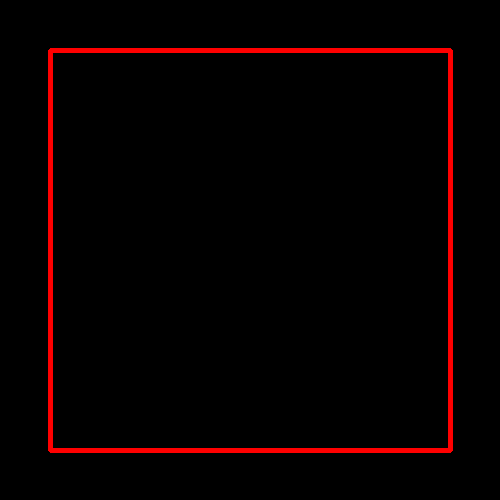

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

width=500
height=500
bpp=3

image = np.zeros((height,width,bpp),np.uint8)

cv.rectangle(image,(50,50),(450,450),(0,0,255),3)

cv2_imshow(image)
cv.waitKey(0);